# 凸集合

凸最適化は色んな所で出てきます。
ここでは凸最適化に必要な基本的な凸集合の知識をまとめておきます。


参考

* [Convex Optimization](https://web.stanford.edu/~boyd/cvxbook/bv_cvxbook.pdf)の2章
* [凸解析の基礎: 凸錐・凸集合・凸関数 (数理経済学叢書)](https://www.amazon.co.jp/dp/4862852467)：良さそう。未読。

## 集合の内包

* Affine集合：$x_1, x_2\in C$について、$\theta x_1+(1-\theta) x_2 \in C$のとき、$C$はAffine集合
* Affine hull：$\mathrm{aff }\; C=\{\theta_1 x_1 +\dots+ \theta_k x_k | x_1, \dots, x_k \in C, \theta_1 +\dots +\theta_k = 1 \}$
* Affine 次元：Affine hullの次元
* Relative interior：$\mathrm{reint }\; C=\{x \in C \mid B(x, r) \cap \operatorname{aff} C \subseteq C$ for some $r>0\}$
    * ここで、$B(x, r)=\{y \mid\|y-x\| \leq r\}$
    * これは例えば3次元空間での2次元平面を扱うときに便利です。
* 集合$C$の触点：$c\in \mathbb{R}^N$が$C$の触点であるとは、$C$の点列$(c_n)_{n\in \mathbb{N}}$で$\lim _{n \rightarrow \infty} c_n=c$を満たすものが存在すること。
    * 例えば$0$は$(0, 1)$の触点ですが、$1.1$は違います。
* 集合の閉包$\mathrm{cl}(C)$：集合の触点全体の集合。$C$の全ての点は触点なので、常に$C \in \mathrm{cl} (C)$。
    * 例えば$\mathrm{Cl}((0,1))=[0,1], \mathrm{Cl}([0,1))=[0,1], \mathrm{Cl}([0,1])=[0,1]$
    * 参考：https://math-fun.net/20210816/17403/
* Relative boundary：$\mathrm{cl}\; C \setminus \mathrm{reint}\; C$

例えば、3次元空間上の長方形
$$
C=\left\{x \in \mathbf{R}^3 \mid-1 \leq x_1 \leq 1,-1 \leq x_2 \leq 1, x_3=0\right\}
$$

を考えてみましょう。

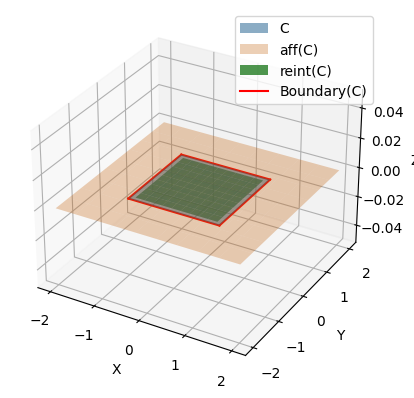

In [39]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

# 集合Cの描画
x = np.linspace(-1, 1, 10)
y = np.linspace(-1, 1, 10)
z = [0]
X, Y = np.meshgrid(x, y)
Z = np.array([z] * Y.shape[0])

surf = ax.plot_surface(X, Y, Z, alpha=0.5, label="C")  # 集合C
surf._edgecolors2d = surf._edgecolor3d
surf._facecolors2d = surf._facecolor3d

# Affine setの描画(一部)
x = np.linspace(-2, 2, 10)
y = np.linspace(-2, 2, 10)
z = [0]
X, Y = np.meshgrid(x, y)
Z = np.array([z] * Y.shape[0])

surf = ax.plot_surface(X, Y, Z, alpha=0.3, label="aff(C)")  # affine set
surf._edgecolors2d = surf._edgecolor3d
surf._facecolors2d = surf._facecolor3d

# reint(C)
x = np.linspace(-0.9, 0.9, 10)
y = np.linspace(-0.9, 0.9, 10)
z = [0]
X, Y = np.meshgrid(x, y)
Z = np.array([z] * Y.shape[0])

surf = ax.plot_surface(X, Y, Z, alpha=0.8, label="reint(C)")  # relative interior
surf._edgecolors2d = surf._edgecolor3d
surf._facecolors2d = surf._facecolor3d


# boundary(C)

x = np.linspace(-1, 1, 10)
y = [-1] * 10
ax.plot(x, y, zs=0, label="Boundary(C)", color="red")
x = np.linspace(-1, 1, 10)
y = [1] * 10
ax.plot(x, y, zs=0, color="red")
y = np.linspace(-1, 1, 10)
x = [-1] * 10
ax.plot(x, y, zs=0, color="red")
y = np.linspace(-1, 1, 10)
x = [1] * 10
ax.plot(x, y, zs=0, color="red")

ax.legend()

plt.show()

# 凸集合

* 凸集合：任意の$x_1, x_2 \in C$と任意の$0 \leq \theta \leq 1$について、$\theta x_1 + (1-\theta)x_2\in C$のとき凸集合と呼ぶ。
* Convex Combination：$\theta_1+\cdots+\theta_k=1$と$\theta_i \geq 0$について、$\theta_1 x_1+\cdots+\theta_k x_k$
* Convex Hull：$\operatorname{conv} C=\left\{\theta_1 x_1+\cdots+\theta_k x_k \mid x_i \in C, \theta_i \geq 0, i=1, \ldots, k, \theta_1+\cdots+\theta_k=1\right\}$
* $R^n$上のConvex body：内部が空ではないコンパクトな凸集合

# Cone

* Cone：任意の$x\in C$に対して、$\theta\geq 0$について$\theta x\in C$なら$C$はCone
* Convex Cone：任意の$x_1, x_2\in C$と任意の$0\leq \theta \leq 1$について、$\theta x_1+(1-\theta) x_2 \in C$
* Conic Combination：$\theta_1, \ldots, \theta_k \geq 0$について、$\theta_1 x_1+\cdots+\theta_k x_k$
* Conic Hull：$\left\{\theta_1 x_1+\cdots+\theta_k x_k \mid x_i \in C, \theta_i \geq 0, i=1, \ldots, k\right\}$ 
* ノルムで定義されるCone：$C=\{(x, t) \mid\|x\| \leq t\} \subseteq \mathbf{R}^{n+1}$
    * 例：Second order cone
$$
C  =\left\{(x, t) \in \mathbf{R}^{n+1} \mid\|x\|_2 \leq t\right\}
 =\left\{\left[\begin{array}{l}
x \\
t
\end{array}\right] \mid\left[\begin{array}{l}
x \\
t
\end{array}\right]^T\left[\begin{array}{cc}
I & 0 \\
0 & -1
\end{array}\right]\left[\begin{array}{l}
x \\
t
\end{array}\right] \leq 0, t \geq 0\right\}
$$

試しにいくつかの点について、Convex HullやConvex Coneを描画してみましょう

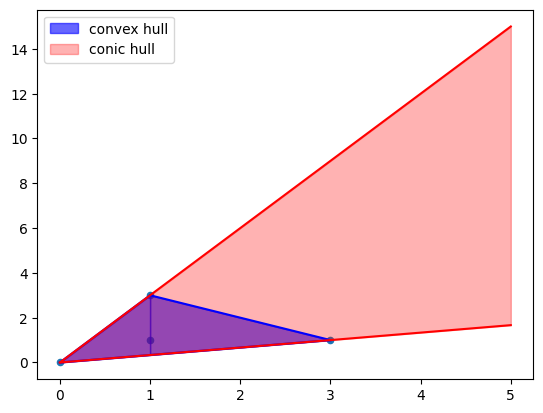

In [96]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()

# 集合の描画
x = [0, 1, 3, 1]
y = [0, 3, 1, 1]
plt.scatter(x, y, s=20)  # 集合

# convex set

xs1 = np.linspace(0.0, x[1], 10)
ys1 = xs1 * y[1] / x[1]
xs2 = np.linspace(0.0, x[2], 10)
ys2 = xs2 * y[2] / x[2]
xs3 = np.linspace(x[1], x[2], 10)
a = (y[2] - y[1]) / (x[2] - x[1])
ys3 = xs3 * a + (y[1] - a * x[1])
plt.plot(xs1, ys1, color="blue")
plt.plot(xs2, ys2, color="blue")
plt.plot(xs3, ys3, color="blue")

ys2_half = xs1 * y[2] / x[2]
plt.fill_between(xs1, ys1, ys2_half, color="blue", alpha=0.6, label="convex hull")
ys2_half2 = xs3 * y[2] / x[2]
plt.fill_between(xs3, ys2_half2, ys3, color="blue", alpha=0.6)

# cone
xs = np.linspace(0.0, 5.0, 10)
ys1 = xs * y[1] / x[1]
ys2 = xs * y[2] / x[2]
plt.plot(xs, ys1, color="red")
plt.plot(xs, ys2, color="red")
plt.fill_between(xs, ys1, ys2, color="red", alpha=0.3, label="conic hull")

plt.legend()
plt.show()

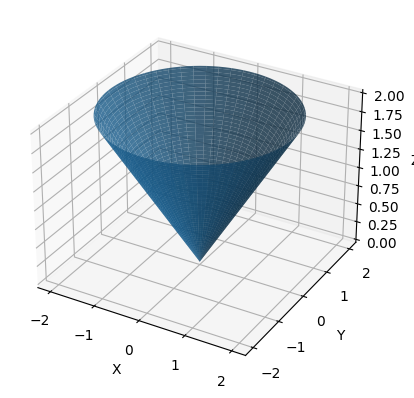

In [111]:
# second-order convex coneを描画します
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

theta = np.linspace(0, 2*np.pi, 100)
r = np.linspace(0, 2, 100)
theta, t =np.meshgrid(theta, r)

X = t*np.cos(theta)
Y = t*np.sin(theta)
Z = t

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.plot_surface(X, Y, Z, alpha=0.8)
plt.show()

## 多面体

* Polyhedra：有限個の線形方程式と不等式の解
    * $\mathcal{P}=\left\{x \mid a_j^T x \leq b_j, j=1, \ldots, m, c_j^T x=d_j, j=1, \ldots, p\right\}$
    * よってこれは有限個のhyperplane($\left\{x \mid a^T\left(x-x_0\right)=0\right\}$)とhalfspace($\left\{x \mid a^T x \leq b\right\}$)の共通部分 
    * Boundedなpolyhedraはpolytopeと呼ばれる（逆の場合もある）
    * Polyhedraは行列を使って簡単に表せる：$\mathcal{P}=\{x \mid A x \preceq b, C x=d\}$
        * ここで、$A=\left[\begin{array}{c}a_1^T \\ \vdots \\ a_m^T\end{array}\right], \quad C=\left[\begin{array}{c}c_1^T \\ \vdots \\ c_p^T\end{array}\right]$

* Simplexes：$C=\operatorname{conv}\left\{v_0, \ldots, v_k\right\}=\left\{\theta_0 v_0+\cdots+\theta_k v_k \mid \theta \succeq 0, \mathbf{1}^T \theta=1\right\}$
    * $v_0, \ldots, v_k \in \mathbf{R}^n$はアフィン独立であるとする。つまり、$v_1-v_0, \ldots, v_k-v_0$は線形独立
    * これもpolyhedraになるよ。実際、行列で書き直せる（p.33）
* Probability simplex： $C=\operatorname{conv}\left\{e_1, \ldots, e_n\right\}=\left\{x_1 e_1+\cdots+x_n e_n \mid x \succeq 0, \mathbf{1}^T x=1\right\}$
    * 単位ベクトル$e_1, \ldots, e_n \in \mathbf{R}^n$で定義される$(n-1)$次元のsimplex
    * probability simplex中のベクトルは確率分布に対応する。$x_i$は$i$番目の要素の確率を表す。

例えばコインの裏表の分布のProbability simplexを描画してみましょう。
表が出る確率を$x$、裏を$y$とすると、
$$C=\operatorname{conv}\left\{e_1, e_2\right\}=\left\{x e_1+y e_2 \mid (x, y) \succeq 0, x + y=1\right\}$$

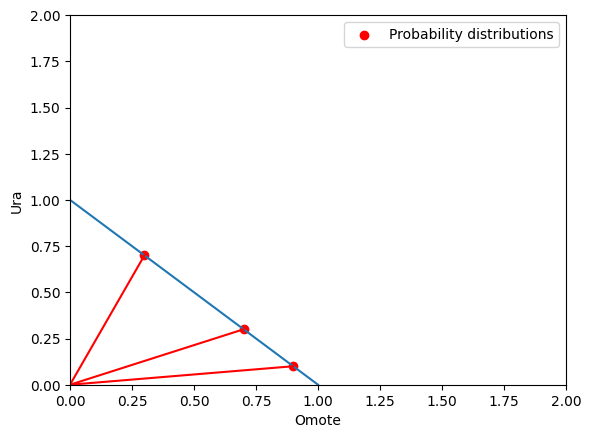

In [122]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()

# probability simplex

xs = np.linspace(0.0, 1, 10)
ys = 1 - xs
plt.plot(xs, ys)

xs = np.array([0.3, 0.7, 0.9])
ys = 1 - xs
plt.scatter(xs, ys, label="Probability distributions", color="red")

for x, y in zip(xs, ys):
    xs = np.linspace(0, x)
    ys = np.linspace(0, y)
    plt.plot(xs, ys, color="red")

plt.ylim(0, 2)
plt.xlim(0, 2)

plt.xlabel("Omote")
plt.ylabel("Ura")

plt.legend()
plt.show()

# Linear-fractional関数とPerspective関数

* Perspective関数 ($P: \mathbf{R}^{n+1} \rightarrow \mathbf{R}^n$)：ピンホールカメラみたいな性質をもつ
    * $\operatorname{dom} P=\mathbf{R}^n \times \mathbf{R}_{++}$
    * $P(z, t)=z/t$で表される。
    * $C \subseteq \operatorname{dom} P$が凸なら、$P(C)=\{P(x) \mid x \in C\}$も凸。ピンホールカメラをイメージすれば分かりやすい。
* Linear-fractional関数：$f=P \circ g$のこと
    * $g: \mathbf{R}^n \rightarrow \mathbf{R}^{m+1}$なる$g(x)=\left[\begin{array}{c}A \\ c^T\end{array}\right] x+\left[\begin{array}{l}b \\ d\end{array}\right]$を定義する。
    * つまり、$f(x)=(A x+b) /\left(c^T x+d\right), \quad \operatorname{dom} f=\left\{x \mid c^T x+d>0\right\}$,

Linear-fractional関数は条件付き確率が張る空間などで使えます。
例えば確率変数$u \in \{1, \dots, n\}$と$v \in \{1, \dots, m\}$を考え、$p_{ij}$を$\operatorname{prob}(u=i, v=j)$とします。このとき、条件付き確率$f_{i j}=\operatorname{prob}(u=i \mid v=j)$は

$$
f_{i j}=\frac{p_{i j}}{\sum_{k=1}^n p_{k j}}
$$

であり、これは$p$のlinear-fractional mappingになっています。


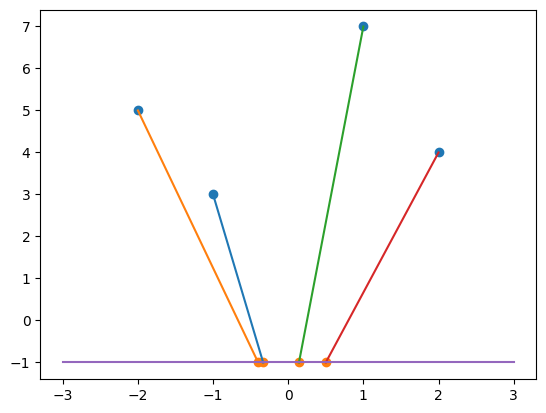

In [156]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()

# perspective関数

xs = [-1, -2, 1, 2]
ys = [3, 5, 7, 4]
plt.scatter(xs, ys)

zs = []
for x, y in zip(xs, ys):
    z = x / y
    zs.append(z)
    plt.plot([x, z], [y, -1])

xs = np.linspace(-3, 3, 10)
ys = np.ones_like(xs)
plt.plot(xs, ys * -1)


plt.scatter(zs, [-1] * len(zs))
plt.show()

Pythonでlinear-fractional関数を試してみましょう。
$$
f(x)=\frac{1}{x_1+x_2+1} x, \quad \operatorname{dom} f=\left\{\left(x_1, x_2\right) \mid x_1+x_2+1>0\right\}
$$
を見てみます。

Text(0.5, 1.0, 'After linear-fractional')

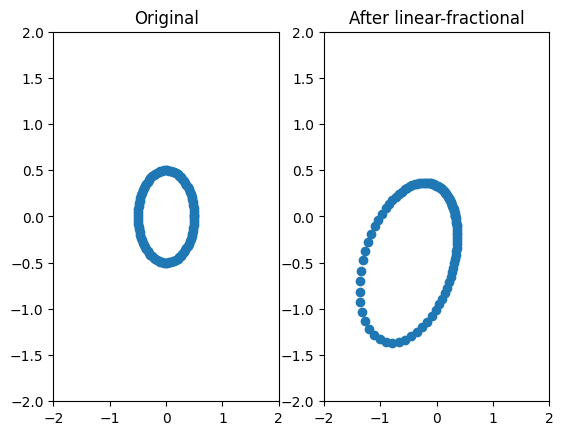

In [172]:
import numpy as np
import matplotlib.pyplot as plt

# Linear-fractional関数　

plt.subplot(1, 2, 1)
t = np.linspace(0, 2 * np.pi, 100)
xs = np.cos(t) * 0.5
ys = np.sin(t) * 0.5

plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.title("Original")
plt.scatter(xs, ys)

plt.subplot(1, 2, 2)
z = np.vstack((xs, ys))
A = np.eye(2)
b = np.zeros(2).reshape(2, 1)
c = np.array([1, 1])
d = 1
z_ = (A @ z + b) / (c @ z + d)

plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.scatter(z_[0], z_[1])
plt.title("After linear-fractional")

## Generalized inequality

次を満たすようなcone $K \subseteq \mathbf{R}^n$をproperなconeと呼びます：
* $K$は凸
* $K$はclosed
* $K$は空でないinteriorを持つ(solid)
* $K$はlineを持たない(pointed)。つまり、$x\in K$ かつ$-x \in K$なら$x=0$。

このようなproperなconeを使って、次のgeneralized inequalityを定義することができます。通常の不等式が$\mathbf{R}$についての順番を定義するのに対して、generalized inequalityは$\mathbf{R}^n$上の順番を定義します。

$$
x \preceq_K y \Longleftrightarrow y-x \in K .
$$

$$
x \prec_K y \Longleftrightarrow y-x \in \operatorname{int} K,
$$

* $K=\mathbf{R}_+$の場合、これは通常の$\leq$や$<$に対応します。また、$K=\mathbf{R}_+^n$の場合、要素ごとの不等式に相当します。
* $K$がpositive semi-definiteなconeのとき、$X \preceq_K Y$は$Y-X$はpositive semi-definiteであることと同じです。

Generalized inequalityが成り立つ性質は[Convex Optimization](https://web.stanford.edu/~boyd/cvxbook/bv_cvxbook.pdf)の2章参照。

これを使うと、集合の中の最大要素や最小要素を定義できます。
* Minimum element：$S \subseteq x+K$を満たす$x$を$S$のminimum elementと呼ぶ
    * ここで、$x+K$は$prec_K$の意味で$x$より大きいすべての要素
* Minimal element：$(x-K) \cap S=\{x\}$を満たす$x$を$S$のminimal elementと呼ぶ
    * ここで、$x-K$は$prec_K$の意味で$x$より小さいすべての要素

試しに$\mathbf{R}^2$の要素ごとの不等式を考えたMinimum ElementとMinimal Element を見てみます。

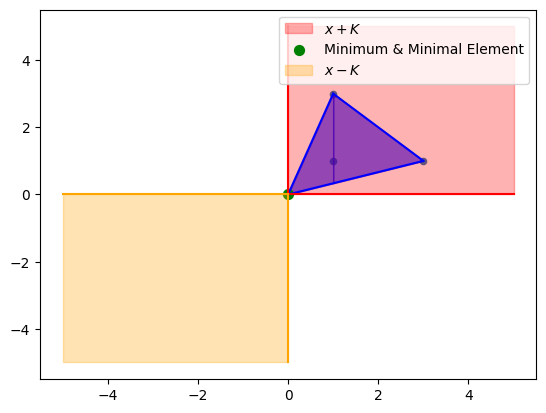

In [188]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()

# 集合の描画
x = [0, 1, 3, 1]
y = [0, 3, 1, 1]
plt.scatter(x, y, s=20)  # 集合

# set
xs1 = np.linspace(0.0, x[1], 10)
ys1 = xs1 * y[1] / x[1]
xs2 = np.linspace(0.0, x[2], 10)
ys2 = xs2 * y[2] / x[2]
xs3 = np.linspace(x[1], x[2], 10)
a = (y[2] - y[1]) / (x[2] - x[1])
ys3 = xs3 * a + (y[1] - a * x[1])
plt.plot(xs1, ys1, color="blue")
plt.plot(xs2, ys2, color="blue")
plt.plot(xs3, ys3, color="blue")

ys2_half = xs1 * y[2] / x[2]
plt.fill_between(xs1, ys1, ys2_half, color="blue", alpha=0.6)
ys2_half2 = xs3 * y[2] / x[2]
plt.fill_between(xs3, ys2_half2, ys3, color="blue", alpha=0.6)

# R2
xs = np.linspace(0.0, 5.0, 10)
ys_zero = np.zeros_like(xs)
plt.plot(xs, ys_zero, color="red")
ys = np.linspace(0.0, 5.0, 10)
xs_zero = np.zeros_like(ys)
plt.plot(xs_zero, ys, color="red")
ys_high = np.ones(10) * 5.0
plt.fill_between(xs, ys_zero, ys_high, color="red", alpha=0.3, label=r"$x + K$")
plt.scatter(0, 0, s=50, label="Minimum & Minimal Element", color="Green")

xs = np.linspace(-5.0, 0.0, 10)
ys_zero = np.zeros_like(xs)
plt.plot(xs, ys_zero, color="orange")
ys = np.linspace(-5.0, 0.0, 10)
xs_zero = np.zeros_like(ys)
plt.plot(xs_zero, ys, color="orange")
ys_low = np.ones(10) * -5.0
plt.fill_between(xs, ys_zero, ys_low, color="orange", alpha=0.3, label=r"$x - K$")
plt.legend()

plt.show()

## 分離超平面定理

* $C \cap D=\emptyset$なconvex setsを考える。このとき、$C$と$D$を分ける超平面$a^T x \geq b$ が存在する。
    * 証明は教科書の48ページ付近参照
    * 逆はconvex setsだけでは成り立たない。例えば$C=D=\{0\}$のとき
* Supporting hyperplane：境界上の点$x_0$を考える。つまり、$x_0 \in \mathbf{b d} C=\mathbf{c l} C \backslash \operatorname{int} C$。このとき、$a\neq 0$が任意の$x\in C$について$a^Tx \leq a^T x_0$を満たすなら、境界$\{x|a^T x = a^T x_0\}$はCについての$x_0$でのsupporting hyperplaneと呼ばれる。教科書の図2.21参照。


## Dual Coneとgeneralized inequality

* $K$がConeのとき、$K^*=\left\{y \mid x^T y \geq 0\right.$ for all $\left.x \in K\right\}$をDual Coneと呼ぶ。
    * Dual coneは常にconeかつ常にclosedなconvexである。　
    * $K_1 \subseteq K_2$なら$K_2^*\subseteq K_1^*$ 
    * $K$がproperなconeなら、$K^*$もproperなcone
    * 詳細は53ページ
* Dual generalized inequality：$K$がproperなら$K^*$もproperなので、$K^*$によるgeneralized inequalityが考えられる。
    * $x \preceq_K y$ if and only if $\lambda^T x \leq \lambda^T y$ for all $\lambda \succeq_{K^*} 0$.
    * $x \prec_K y$ if and only if $\lambda^T x<\lambda^T y$ for all $\lambda \succeq_{K^*} 0, \lambda \neq 0$.
* Dual generalized inequalityによるminimum element
    * $x$は$\preceq_K$について$S$のminimum element  $\Leftrightarrow$ 任意の$\lambda \succ_{K^*} 0$について、$x$が$z \in S$についての$\lambda^T z$のunique minimizer。
    * 幾何的な意味は教科書Figure 2.23参照
* Dual generalized inequalityによるminimal element
    * $x$は$\preceq_K$について$S$のminimal element  $\Leftrightarrow$ $\lambda \succ_{K^*} 0$について、$x$が$z \in S$についての$\lambda^T z$のminimizer。
    * 幾何的な意味は教科書Figure 2.23参照


(100,)